In [7]:
import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score

input_df = pd.read_csv("data/answer_weather_ordinal.csv", sep=",")
truth_df = pd.read_csv("data/truth_adult_ordinal.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
accSAD = []
accBAU = []
accMAS = []
w_f1_SAD = []
w_f1_BAU = []
w_f1_MAS = []
m_f1_SAD = []
m_f1_BAU = []
m_f1_MAS = []



def grapher():
    dataRed.append(1)
    annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    accBAU.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accSAD.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accMAS.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    w_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    m_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))



grapher()

plt.plot(np.array(dataRed),np.array(m_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(m_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(m_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(m_f1_SAD-np.std(m_f1_SAD)),np.array(m_f1_SAD+np.std(m_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(m_f1_MAS-np.std(m_f1_MAS)),np.array(m_f1_MAS+np.std(m_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(m_f1_BAU-np.std(m_f1_BAU)),np.array(m_f1_BAU+np.std(m_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Adult (Macro F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Macro_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Adult(Macro_F1).png')
plt.show()





1


ValueError: Found input variables with inconsistent numbers of samples: [318, 664]

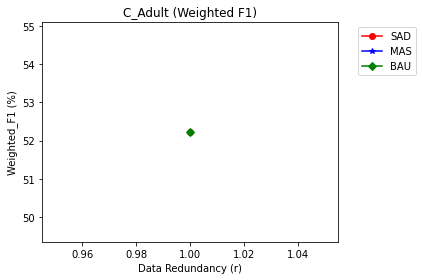

In [5]:

plt.plot(np.array(dataRed),np.array(w_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(w_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(w_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(w_f1_SAD-np.std(w_f1_SAD)),np.array(w_f1_SAD+np.std(w_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(w_f1_MAS-np.std(w_f1_MAS)),np.array(w_f1_MAS+np.std(w_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(w_f1_BAU-np.std(w_f1_BAU)),np.array(w_f1_BAU+np.std(w_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Adult (Weighted F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Weighted_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Adult(Weighted_F1).png')
plt.show()






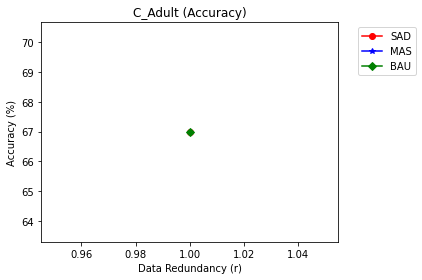

In [6]:


plt.plot(np.array(dataRed),np.array(accSAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(accMAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(accBAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(accSAD-np.std(accSAD)),np.array(accSAD+np.std(accSAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(accMAS-np.std(accMAS)),np.array(accMAS+np.std(accMAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(accBAU-np.std(accBAU)),np.array(accBAU+np.std(accBAU)),alpha=0.2,color='g')


plt.title("C_Adult (Accuracy)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Adult(Accuracy).png')
plt.show()
















